In [28]:
import random
import numpy as np
random.seed(42)
np.random.seed(42)

PATH = 'C:/Users/TobiasRummelsberger/PycharmProjects/house-price-prediction/'
#PATH = '/Users/tobias/PycharmProjects/house-price-prediction/'
DATA_PATH = 'obj/data/'

In [29]:
train_path = 'input_data/train.csv'
test_path = 'input_data/test.csv'

In [30]:
import pandas as pd
from load_data import load_data

X_train, X_test, y_train, y_test = load_data(PATH + DATA_PATH + train_path)

X_test = pd.read_csv(PATH + DATA_PATH + test_path)
submission_index = X_test['Id']

The data set contains 43 categorical features and 37 numerical features. The train data set contains 1168 rows and the test data set contains 292 rows.
The categorical features are ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] and the numerical features are ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQual

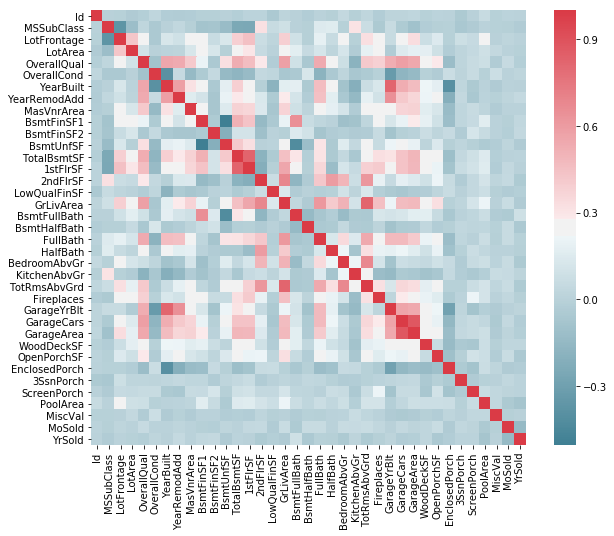

0

In [31]:
from exploratory_data_analysis.eda import plot_correlation_matrix, plot_scatter_matrix

plot_correlation_matrix(X_train)
#plot_scatter_matrix(X_train, columns=['SalePrice', 'LotArea'])

# Replace or Drop NA VALUES

In [32]:
from feature_preprocessing import preprocess_alley, preprocess_LotFrontage, preprocess_MasVnrType, preprocess_BsmtQual, preprocess_BsmtCond, preprocess_BsmtExposure, preprocess_BsmtFinType1, preprocess_BsmtFinType2, preprocess_Electrical, preprocess_FireplaceQu, preprocess_GarageType, preprocess_GarageFinish, preprocess_GarageQual, preprocess_GarageCond, preprocess_PoolQC, preprocess_Fence, preprocess_MiscFeature, preprocess_MSZoning, preprocess_Utilities, preprocess_Exterior1st, preprocess_Exterior2nd, preprocess_KitchenQual, preprocess_Functional, preprocess_SaleType
import pandas as pd
import numpy as np

X_train, X_test = preprocess_alley(X_train, X_test)
X_train, X_test = preprocess_MSZoning(X_train, X_test)
X_train, X_test = preprocess_LotFrontage(X_train, X_test)
X_train, X_test = preprocess_MasVnrType(X_train, X_test)
X_train, X_test = preprocess_BsmtQual(X_train, X_test)
X_train, X_test = preprocess_BsmtCond(X_train, X_test)
X_train, X_test = preprocess_BsmtExposure(X_train, X_test)
X_train, X_test = preprocess_BsmtFinType1(X_train, X_test)
X_train, X_test = preprocess_BsmtFinType2(X_train, X_test)
X_train, X_test = preprocess_Electrical(X_train, X_test)
X_train, X_test = preprocess_FireplaceQu(X_train, X_test)
X_train, X_test = preprocess_GarageType(X_train, X_test)
X_train, X_test = preprocess_GarageFinish(X_train, X_test)
X_train, X_test = preprocess_GarageQual(X_train, X_test)
X_train, X_test = preprocess_GarageCond(X_train, X_test)
X_train, X_test = preprocess_PoolQC(X_train, X_test)
X_train, X_test = preprocess_Fence(X_train, X_test)
X_train, X_test = preprocess_MiscFeature(X_train, X_test)
X_train, X_test = preprocess_Utilities(X_train, X_test)
X_train, X_test = preprocess_Exterior1st(X_train, X_test)
X_train, X_test = preprocess_Exterior2nd(X_train, X_test)
X_train, X_test = preprocess_KitchenQual(X_train, X_test)
X_train, X_test = preprocess_Functional(X_train, X_test)
X_train, X_test = preprocess_SaleType(X_train, X_test)

In [33]:
from feature_preprocessing import one_hot_encoding

X_train.fillna(value=0, inplace=True)
X_test.fillna(value=0, inplace=True)

X_train, X_test = one_hot_encoding(X_train, X_test, PATH)

In [34]:
from feature_preprocessing import principal_component_analysis

#X_train, X_test = principal_component_analysis(X_train, X_test, PATH)

In [12]:
import xgboost as xgb
from model import train_gridsearch_cv
from model import negative_mean_absolute_percentage_error

XGBoostRegressor = xgb.XGBRegressor()
param_grid = {'eta':[0.2, 0.3, 0.5], 
              'max_deth':[3, 5], 
              'learning_rate':[0.01, 0.07], 
              'n_estimators':[1000,],
              'booster':['gbtree',], 
              'min_child_weight':[0.5, 1.0, 2.0], 
              'subsample':[0.7, 1.0],
              'random_state':[42,], 
              'tree_method': ['auto',], 
              'alpha': [2,],
              'gamma': [1,],
              'lambda':[1,], 
              'colsample_bytree': [1,]}
model_xgb = train_gridsearch_cv(XGBoostRegressor, X_train, y_train, param_grid)
print(-negative_mean_absolute_percentage_error(estimator=model_xgb, X=X_test, y_true=y_test))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  9.7min finished


9.76546828422798


In [13]:
from sklearn.ensemble import RandomForestRegressor
from model import train_gridsearch_cv
from model import negative_mean_absolute_percentage_error

param_grid = {'n_estimators': [50, 100],
              'max_features': [None, 'auto'],
              'min_samples_leaf': [2]}

model_rf = train_gridsearch_cv(RandomForestRegressor(), X_train, y_train, param_grid)
print(-negative_mean_absolute_percentage_error(estimator=model_rf, X=X_train, y_true=y_train))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.3s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.8s finished


4.315173289054959


In [14]:
from sklearn.linear_model import ElasticNet
from model import negative_mean_absolute_percentage_error
from model import train_gridsearch_cv

model_el = ElasticNet()
model_el = model_el.fit(X_train, y_train)

print(-negative_mean_absolute_percentage_error(estimator=model_el, X=X_train, y_true=y_train))

10.281488213536049


c:\users\tobiasrummelsberger\.virtualenvs\house-price-prediction-_weolqlx\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [35]:
prediction_xgboost = model_xgb.predict(X_test)
prediction_rf = model_rf.predict(X_test)
prediction_el = model_el.predict(X_test)

prediction = pd.DataFrame(data=prediction_el,
                          columns=['ElasticNet'],
                          index=submission_index)
prediction['RandomForest'] = prediction_rf
prediction['XGBoost'] = prediction_xgboost
prediction['SalePrice'] = prediction.mean(axis=1)
prediction = prediction['SalePrice']
prediction['y_true'] = list(y_test)

In [36]:
prediction = pd.DataFrame(data=prediction, columns=['SalePrice'], index=submission_index)
prediction.to_csv(PATH + DATA_PATH + 'prediction.csv')